In [13]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [14]:
#Loading & reading a dataset
df =pd.read_csv(r"C:\Users\karan\Downloads\student_success_realstyle_dataset.csv")
print('sample data')
print(df.head(5))

sample data
   studyhours  attendance  pastscores internet  sleephours passed
0           5          65          65      yes           4     no
1           7          85          91       no           8    yes
2           4          98          86       no           6    yes
3           4          54          90      yes           6     no
4           8          93          47      yes           7    yes


In [15]:
#show columns row & column
print('Dataset Shape')
print(f'rows{df.shape[0]} ,columns: {df.shape[1]}')


Dataset Shape
rows70 ,columns: 6


In [16]:
#Dataset info & summary statistics
print(df.info())
print(df.describe (include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   studyhours  70 non-null     int64 
 1   attendance  70 non-null     int64 
 2   pastscores  70 non-null     int64 
 3   internet    70 non-null     object
 4   sleephours  70 non-null     int64 
 5   passed      70 non-null     object
dtypes: int64(4), object(2)
memory usage: 3.4+ KB
None
        studyhours  attendance  pastscores internet  sleephours passed
count    70.000000   70.000000   70.000000       70   70.000000     70
unique         NaN         NaN         NaN        2         NaN      2
top            NaN         NaN         NaN      yes         NaN     no
freq           NaN         NaN         NaN       53         NaN     46
mean      5.071429   76.328571   69.457143      NaN    6.485714    NaN
std       2.644773   14.919806   18.373489      NaN    1.665880    NaN
min       1.000000   50.00

In [17]:
#Check missing values
print ('missing values')
print (df.isnull())

missing values
    studyhours  attendance  pastscores  internet  sleephours  passed
0        False       False       False     False       False   False
1        False       False       False     False       False   False
2        False       False       False     False       False   False
3        False       False       False     False       False   False
4        False       False       False     False       False   False
..         ...         ...         ...       ...         ...     ...
65       False       False       False     False       False   False
66       False       False       False     False       False   False
67       False       False       False     False       False   False
68       False       False       False     False       False   False
69       False       False       False     False       False   False

[70 rows x 6 columns]


In [6]:
#Data Preprocessing
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv(r"C:\Users\karan\Downloads\student_success_realstyle_dataset.csv")

#Print Missing value in each column
print(data.isnull().sum())

#label encoding
le =LabelEncoder()
data['internet']=le.fit_transform(data['internet'])     #Yes become 1 & No=0
data['passed']=le.fit_transform(data['passed'])         #Yes become 1 & No=0

print('After Encoding')
print(data.head())


studyhours    0
attendance    0
pastscores    0
internet      0
sleephours    0
passed        0
dtype: int64
After Encoding
   studyhours  attendance  pastscores  internet  sleephours  passed
0           5          65          65         1           4       0
1           7          85          91         0           8       1
2           4          98          86         0           6       1
3           4          54          90         1           6       0
4           8          93          47         1           7       1


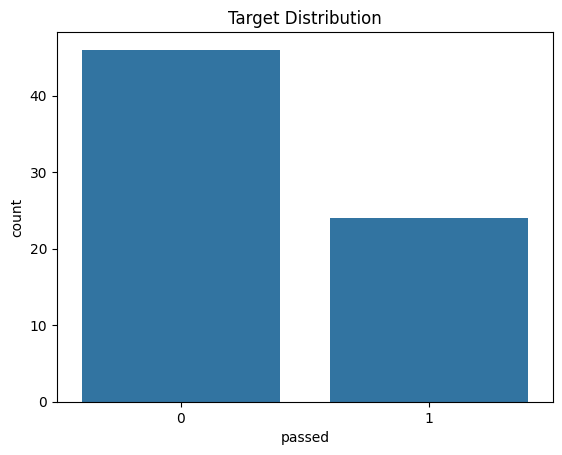

In [19]:
#Exploratory Data Analysis
plt.figure()
sns.countplot(x='passed', data=data)
plt.title("Target Distribution")
plt.show()


In [20]:
# Feature Scaling = StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


data = pd.read_csv(r"C:\Users\karan\Downloads\student_success_realstyle_dataset.csv")

print("Original Data Sample:")
print(data.head())


le = LabelEncoder()
data["internet"] = le.fit_transform(data["internet"])   # yes=1 , no=0
data["passed"]   = le.fit_transform(data["passed"])     # yes=1 , no=0

print("\nAfter Label Encoding:")
print(data.head())


features = ["studyhours", "attendance", "pastscores", "internet", "sleephours"]

scaler = StandardScaler()

data_scaled = data.copy()
data_scaled[features] = scaler.fit_transform(data[features])

print("\nAfter Scaling:")
print(data_scaled.head())


X = data_scaled[features]
y = data_scaled["passed"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)




Original Data Sample:
   studyhours  attendance  pastscores internet  sleephours passed
0           5          65          65      yes           4     no
1           7          85          91       no           8    yes
2           4          98          86       no           6    yes
3           4          54          90      yes           6     no
4           8          93          47      yes           7    yes

After Label Encoding:
   studyhours  attendance  pastscores  internet  sleephours  passed
0           5          65          65         1           4       0
1           7          85          91         0           8       1
2           4          98          86         0           6       1
3           4          54          90         1           6       0
4           8          93          47         1           7       1

After Scaling:
   studyhours  attendance  pastscores  internet  sleephours  passed
0   -0.027202   -0.764780   -0.244337  0.566352   -1.502907       0

In [8]:
#train an model
model = LogisticRegression()
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       0.75      0.38      0.50         8

    accuracy                           0.57        14
   macro avg       0.62      0.60      0.56        14
weighted avg       0.64      0.57      0.55        14



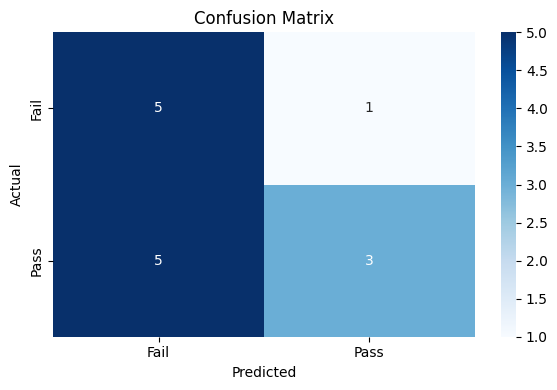

In [9]:
# 7. Model Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Fail", "Pass"],
    yticklabels=["Fail", "Pass"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



In [10]:
# User Input Prediction
print("\n--- Predict Your Result ---")

try:
    study_hours = float(input("Enter Study Hours: "))
    attendance  = float(input("Enter Attendance (%): "))
    past_score  = float(input("Enter Past Score: "))
    sleep_hours = float(input("Enter Sleep Hours: "))
    internet_in = input("Internet Access (yes/no): ").strip().lower()

    # convert yes/no to 1/0
    internet_val = 1 if internet_in == "yes" else 0

    user_input_data = pd.DataFrame([{
        "studyhours": study_hours,
        "attendance": attendance,
        "pastscores": past_score,
        "internet": internet_val,
        "sleephours": sleep_hours
    }])

    user_pred = model.predict(user_input_data)

    if user_pred[0] == 1:
        print("Prediction: PASS")
    else:
        print("Prediction: FAIL")

except ValueError:
    print("Please enter valid numeric values")



--- Predict Your Result ---


Enter Study Hours:  50
Enter Attendance (%):  60
Enter Past Score:  20
Enter Sleep Hours:  9
Internet Access (yes/no):  0


Prediction: PASS
